In [2]:
import cv2
import matplotlib.pylab as plt
import numpy as np
import glob
import os
import cPickle as pickle
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (15.0, 15.0)

In [3]:
!file ../../data/datasets/stage1_train/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9/images/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9.png

../../data/datasets/stage1_train/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9/images/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9.png: PNG image data, 256 x 256, 8-bit/color RGBA, non-interlaced


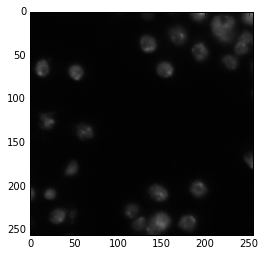

In [12]:
plt.imshow(img)
plt.show()

In [16]:
np.any(img[:,:,0] == img[:,:,1])

True

In [17]:
np.any(img[:,:,1] == img[:,:,2])

True

In [30]:
def show_mask(mask_folder):
    fnames = glob.glob(os.path.join(mask_folder, "*.png"))
    masks = np.array([cv2.imread(x)[:,:,0] for x in fnames])
    print(masks.shape)
    mask = np.sum(masks, axis=0)
    print(mask.shape)
    plt.imshow(mask, cmap=plt.cm.gray)
    plt.show()
    return mask

(27, 256, 256)
(256, 256)


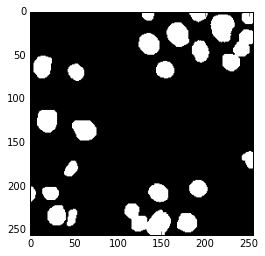

In [32]:
mask = show_mask("../../data/datasets/stage1_train/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9/masks")

In [100]:
def show_nuclei(img_folder, show=False):
    img_fname = glob.glob(os.path.join(img_folder, "images", "*.png"))[0]
    img = cv2.imread(img_fname)
    
 
    mask_fnames = glob.glob(os.path.join(img_folder, "masks", "*.png"))
    masks = np.array([cv2.imread(x)[:,:,0] for x in mask_fnames]) 
    mask = (np.sum(masks, axis=0) > 0).astype(np.uint8)
    
    if show:
        plt.subplot(121)
        plt.imshow(img)

        plt.subplot(122)
        plt.imshow(mask, cmap=plt.cm.gray)
        plt.show()
    return img, mask

In [101]:
k = show_nuclei("../../data/datasets/stage1_train/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9")

In [55]:
! ls ../../data/datasets/stage1_train/*/images/*.png | wc -l

670


In [57]:
print(len(glob.glob("../../data/datasets/stage1_train/*/masks/*.png")))

29461


In [102]:
def get_dataset(folder):
    imgs_folders = glob.glob(os.path.join(folder, "*"))
    ds = {}
    ds['image'] = np.zeros((len(imgs_folders), 256, 256), dtype=np.uint8)
    ds['gt'] = np.zeros((len(imgs_folders), 256, 256, 2), dtype=np.uint8)
    ds['image_id'] = [None] * len(imgs_folders)
    
    cnt = 0
    for i, f in enumerate(imgs_folders):
        print(f)
        img, mask = show_nuclei(f)
        print(mask.shape)
        if (mask.shape[0]!=256 or mask.shape[1]!=256):
            print("different size")
            continue
        ds['image'][i] = img[:,:,0]
        print(mask.shape)
        ds['gt'][i,...,1] = mask
        ds['gt'][i,:,:,0] = 1 - mask
        ds['image_id'][i] = os.path.basename(f)
        cnt += 1
    
    print("totol # read: %s" % cnt)
    return ds
    

In [103]:
ds = get_dataset("../../data/datasets/stage1_train")

../../data/datasets/stage1_train/2349e95ece2857c89db7e4a8be8c88af0b45f3c4262608120cb3bd6ef51fd241
(256, 256)
(256, 256)
../../data/datasets/stage1_train/1b2bf5933b0fb82918d278983bee66e9532b53807c3638efd9af66d20a2bae88
(256, 256)
(256, 256)
../../data/datasets/stage1_train/1f6b7cead15344593b32d5f2345fc26713dc74d9b31306c824209d67da401fd8
(520, 696)
different size
../../data/datasets/stage1_train/175dbb364bfefc9537931144861c9b6e08934df3992782c669c6fe4234319dfc
(520, 696)
different size
../../data/datasets/stage1_train/74a7785530687a11ecd073e772f90912d9967d02407a192bfab282c35f55ab94
(256, 320)
different size
../../data/datasets/stage1_train/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e
(256, 320)
different size
../../data/datasets/stage1_train/fe80a2cf3c93dafad8c364fdd1646b0ba4db056cdb7bdb81474f957064812bba
(520, 696)
different size
../../data/datasets/stage1_train/930f246a8e4ff273a72a6e4b3cf8e8caff94fca4eaf1dbe6f93ba37b8195c0a0
(256, 256)
(256, 256)
../../data/datasets/

In [104]:
ds['image'].shape

(670, 256, 256)

In [105]:
ds['gt'].shape

(670, 256, 256, 2)

In [107]:
np.max(ds['gt'][0][:,:,1])

1

In [113]:
idx = [i for i, f in enumerate(ds['image_id']) if f is None]
print len(idx)

336


In [117]:
a = np.delete(ds['image'], idx, axis=0)
ds['image'] = a
b = np.delete(ds['gt'], idx, axis=0)
ds['gt'] = b

In [119]:
ds['gt'].shape

(334, 256, 256, 2)

In [136]:
c = ds['gt'][:,:,:,1]
print(c.shape)
ds['gt'] = c

(334, 256, 256)


In [17]:
c = ds['image']
print np.max(c), np.min(c)

255 0


In [19]:
c = c / float(np.max(c))
print np.max(c), np.min(c)
ds['image'] = c

1.0 0.0


In [37]:
def one_hot_encoding(a):
    a = np.reshape(a, a.shape+(1,))
    print(a.shape)
    a1 = 1 - a
    b = np.concatenate((a1, a), axis=len(a.shape)-1)
    return b
    

In [21]:
with open("train_set.pkl", "wb") as f:
        pickle.dump(ds, f, protocol=pickle.HIGHEST_PROTOCOL)
    

In [4]:
with open("train_set.pkl", "r") as f:
    ds = pickle.load(f)

# ds['gt'] = one_hot_encoding(ds['gt'])
ds['gt'] = ds['gt'].astype(np.bool)

In [5]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util
from tf_unet import image_util

In [18]:
data_provider = image_util.SimpleDataProvider(ds['image'], ds['gt'])

In [19]:

net = unet.Unet(channels=data_provider.channels, 
                n_class=data_provider.n_class, 
                cost='cross_entropy', 
                layers=3, 
                features_root=64,
                cost_kwargs=dict(regularizer=0.001),
                )


2018-04-13 18:02:23,854 self.x .shape: (?, ?, ?, 1)
2018-04-13 18:02:23,856 Layers 3, features 64, filter size 3x3, pool size: 2x2
2018-04-13 18:02:23,881 layer: 0, conv1.shape: (?, ?, ?, 64)
2018-04-13 18:02:23,888 layer: 0, conv2.shape: (?, ?, ?, 64)
2018-04-13 18:02:23,890 layer: 0, dw_h_convs[layer].shape: (?, ?, ?, 64)
2018-04-13 18:02:23,891 layer: 0, pools[layer] .shape: (?, ?, ?, 64)
2018-04-13 18:02:23,911 layer: 1, conv1.shape: (?, ?, ?, 128)
2018-04-13 18:02:23,917 layer: 1, conv2.shape: (?, ?, ?, 128)
2018-04-13 18:02:23,923 layer: 1, dw_h_convs[layer].shape: (?, ?, ?, 128)
2018-04-13 18:02:23,924 layer: 1, pools[layer] .shape: (?, ?, ?, 128)
2018-04-13 18:02:23,945 layer: 2, conv1.shape: (?, ?, ?, 256)
2018-04-13 18:02:23,952 layer: 2, conv2.shape: (?, ?, ?, 256)
2018-04-13 18:02:23,956 layer: 2, dw_h_convs[layer].shape: (?, ?, ?, 256)
2018-04-13 18:02:23,974 layer: 1, deconv_tmp.shape: (?, ?, ?, ?)
2018-04-13 18:02:23,976 crop_and_concat, x1.shape: (?, ?, ?, 128), x2.shap

In [21]:
batch_size = 8
training_iters = ds['image'].shape[0] / batch_size
print(batch_size, training_iters)
trainer = unet.Trainer(net, batch_size=batch_size, optimizer="momentum", opt_kwargs=dict(momentum=0.8, learning_rate=0.01))
path = trainer.train(data_provider, "./unet_trained", 
                       training_iters=training_iters, epochs=20, display_step=2)

(8, 41)


2018-04-13 18:05:46,668 Removing '/workvol/home1/steven/proj/steven/2018-nuclei/code/noteboook/prediction'
2018-04-13 18:05:46,669 Removing '/workvol/home1/steven/proj/steven/2018-nuclei/code/noteboook/unet_trained'
2018-04-13 18:05:46,672 Allocating '/workvol/home1/steven/proj/steven/2018-nuclei/code/noteboook/prediction'
2018-04-13 18:05:46,672 Allocating '/workvol/home1/steven/proj/steven/2018-nuclei/code/noteboook/unet_trained'
2018-04-13 18:05:47,117 pred_shape: (4, 216, 216, 2)
2018-04-13 18:05:47,343 Verification error= 83.9%, loss= 1.4286
2018-04-13 18:05:47,939 Start optimization
2018-04-13 18:05:52,196 Iter 0, Minibatch Loss= 1.4166, Training Accuracy= 0.6880, Minibatch error= 31.2%
2018-04-13 18:05:54,096 Iter 2, Minibatch Loss= 1.3523, Training Accuracy= 0.9285, Minibatch error= 7.2%
2018-04-13 18:05:56,049 Iter 4, Minibatch Loss= 1.3053, Training Accuracy= 0.9402, Minibatch error= 6.0%
2018-04-13 18:05:57,942 Iter 6, Minibatch Loss= 1.2655, Training Accuracy= 0.9192, Minib

In [22]:
x_test, y_test = data_provider(1)

In [66]:
np.max(ds['image']), np.min(ds['image']), np.max(ds['gt']), np.min(ds['gt'])

(1.0, 0.0, True, False)

In [23]:
prediction = net.predict("./unet_trained/model.cpkt", x_test)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.cpkt


2018-04-13 18:25:46,456 Restoring parameters from ./unet_trained/model.cpkt
2018-04-13 18:25:46,659 Model restored from file: ./unet_trained/model.cpkt


((216, 216), (256, 256))
((216, 216), (256, 256), (216, 216))
(550, 225, 0)
dice: 0.709677


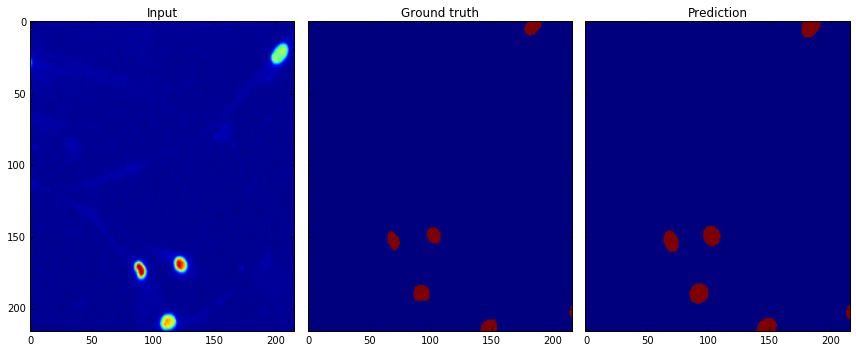

In [40]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
gt = y_test[0,...,1]
mask = prediction[0,...,1] > 0.5
gt_cropped = crop_to_shape(gt, mask.shape)
ax[1].imshow(gt_cropped, aspect="auto")
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
#fig.savefig("../docs/toy_problem.png")

def crop_to_shape(data, shape):
    """
    Crops the array to the given image shape by removing the border (expects a tensor of shape [batches, nx, ny, channels].
    
    :param data: the array to crop
    :param shape: the target shape
    """
    offset0 = (data.shape[0] - shape[0])//2
    offset1 = (data.shape[1] - shape[1])//2
    return data[offset0:(-offset0), offset1:(-offset1)]

def calc_dice(pred, gt):
    print(pred.shape, gt.shape)
    gt_cropped = crop_to_shape(gt, pred.shape)
    print(pred.shape, gt.shape, gt_cropped.shape)
    pred = pred.astype(np.bool)
    tp = np.sum(np.logical_and(pred==True, gt_cropped==True))
    fp = np.sum(np.logical_and(pred==True, gt_cropped==False))
    fn = np.sum(np.logical_and(pred==False, gt_cropped==True))
    
    print(tp,fp,fn)
    dice = tp / float(tp+fp+fn)
    return dice
    

print("dice: %f" % calc_dice(mask, y_test[0,...,1]))

In [27]:
np.min(mask), np.max(mask)

(False, True)

In [30]:
np.max(y_test[0,...,1])

1.0

In [41]:
def unet_size(s, L):
    s0 = s
    for i in range(L-1):
        s = (s-4) / 2
        print("layer %d, %d" % (i+1, s))
    s -= 4
    print("Layer %d, %d" % (L, s))
    for i in range(L-2, -1, -1):
        s = s*2 - 4
        print("Layer %d, %d" % (i+1, s))
    
    return s, s0-s 

In [43]:
unet_size(296, 3)

layer 1, 146
layer 2, 71
Layer 3, 67
Layer 2, 130
Layer 1, 256


(256, 40)

In [44]:
 ds['gt'].shape

(334, 256, 256)

In [61]:
import math
def calc_parts(x, s):
    n_parts = int(math.ceil(x/float(s)))
    parts = []
    for i in range(n_parts):
        if i == n_parts-1:
            p = x - s
        else:
            p = i * s
        parts.append(p)

    return parts



def split_parts(img, mask, s=(256,256)):
    assert(img.shape[0] == mask.shape[0] and img.shape[1] == mask.shape[1])

    if img.shape[0] < s[0] or img.shape[1] < s[1]:
        raise ValueError("image shape is less than %d" % s)

    h_parts = calc_parts(img.shape[0], s[0])
    w_parts = calc_parts(img.shape[1], s[1])

    img_parts = []
    mask_parts = []
    parts = []

    for h in h_parts:
        for w in w_parts:
            img_parts.append(img[h:h+s[0], w:w+s[1]])
            mask_parts.append(mask[h:h+s[0], w:w+s[1]])
            parts.append([h, w])

    return img_parts, mask_parts, parts

In [62]:
calc_parts(384, 100)

[0, 100, 200, 284]

In [63]:
a = split_parts(np.ones((384,384)), np.zeros((384,384)))

In [74]:
a[1][1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
a[2]

[[0, 0], [0, 128], [128, 0], [128, 128]]

In [75]:
a = np.ones((100,100,50))

In [76]:
a[10:50,20:40].shape

(40, 20, 50)

In [96]:
with open("../../data/preprocess/train_set.pkl", "rb") as f:
    ds = pickle.load(f)

In [97]:
ds.values()[3][2]['raw_shape']

(520, 696, 3)

In [4]:
a = [[1, 2], [3, 4]]
b = np.pad(a, ((3, 2), (2, 3)), 'minimum')
print b.shape
print b

(7, 7)
[[1 1 1 2 1 1 1]
 [1 1 1 2 1 1 1]
 [1 1 1 2 1 1 1]
 [1 1 1 2 1 1 1]
 [3 3 3 4 3 3 3]
 [1 1 1 2 1 1 1]
 [1 1 1 2 1 1 1]]


In [6]:
b = np.pad(a, ((3, 2), (2, 3)), 'constant', constant_values=0)

In [7]:
b

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 0, 0, 0],
       [0, 0, 3, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [8]:

def padding_array(ary, offset, default_val=0):
    p1 = offset/2
    p2 = offset - p1

    ary_padded = np.pad(ary, ((p1, p2),(p1, p2)), "constant", constant_values=default_val)

    return ary_padded

In [13]:
c = np.array([[0,1],[1,0]], dtype=np.bool)
padding_array(c, 7, 0)

array([[False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False,  True, False, False, False, False],
       [False, False, False,  True, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False]])

In [18]:
def rle_encoding(x):
    dots = np.where(x.T.flatten() == 1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths


def encode_pred(pred):
    pred = np.transpose(pred).flatten()
    code = []
    flag = 0
    p = [0, 0]
    for i, x in enumerate(pred):
        if flag == 0 and x == 0:
            continue
        elif flag == 0 and x == 1:
            p[0] = i+1
            p[1] = 1 
            flag = 1
        elif flag == 1 and x == 1:
            p[1] += 1
        elif flag == 1 and x == 0:
            code.append(p)
            flag = 0
            p = [0, 0]
        else:
            pass
    if flag == 1:
        code.append(p)

    return code

In [15]:
whole_pred = np.array([[0,1,1,0],
                       [1,0,1,1],
                       [1,0,1,1],
                       [1,0,1,0]], dtype=np.bool)
rle_encoding(whole_pred)

[2, 4, 9, 4, 14, 2]

In [17]:
%timeit rle_encoding(whole_pred)

The slowest run took 17.34 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.18 µs per loop


In [19]:
%timeit encode_pred(whole_pred)

The slowest run took 15.67 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 20.1 µs per loop


In [21]:
np.where(whole_pred.T.flatten() == 1)[0]

array([ 1,  2,  3,  4,  8,  9, 10, 11, 13, 14])

In [22]:
?np.where

In [23]:
x = np.arange(9.).reshape(3, 3)

In [24]:
x

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [25]:
np.where(x>5)

(array([2, 2, 2]), array([0, 1, 2]))

In [27]:

np.nonzero(np.arange(9.)>5)

(array([6, 7, 8]),)

In [28]:
fname = "/home/steven/proj/steven/2018-nuclei/data/datasets/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png"

In [29]:
img = cv2.imread(fname,  cv2.IMREAD_GRAYSCALE)

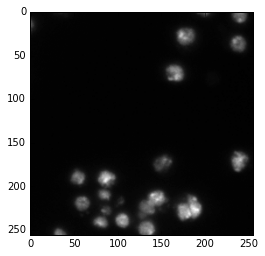

In [33]:
plt.imshow(img, cmap=plt.cm.gray)

In [34]:
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [36]:
img.shape

(256, 256)

In [37]:
buf = cv2.imencode(".png", img)

In [39]:
s = buf[1].tostring()

In [42]:
with open("/tmp/2.png", "wb") as f:
    f.write(s)

In [52]:
from aivis.base.mlog import initlog
import logging
initlog()
def calc_size(s, L):
    s0 = s
    for i in range(L - 1):
        s = (s - 4) / 2
        logging.info("layer %d, %d" % (i + 1, s))
    s -= 4
    print("Layer %d, %d" % (L, s))
    for i in range(L - 2, -1, -1):
        s = s * 2 - 4
        logging.info("Layer %d, %d" % (i + 1, s))
    return s, s0 - s

In [53]:
calc_size(256, 5)

[04/18/18 15:55:41(329489509)] INFO	layer 1, 126
[04/18/18 15:55:41(329489509)] INFO	layer 1, 126
[04/18/18 15:55:41(329489509)] INFO	layer 1, 126
[04/18/18 15:55:41(329489509)] INFO	layer 1, 126
[04/18/18 15:55:41(329489517)] INFO	layer 2, 61
[04/18/18 15:55:41(329489517)] INFO	layer 2, 61
[04/18/18 15:55:41(329489517)] INFO	layer 2, 61
[04/18/18 15:55:41(329489517)] INFO	layer 2, 61
[04/18/18 15:55:41(329489523)] INFO	layer 3, 28
[04/18/18 15:55:41(329489523)] INFO	layer 3, 28
[04/18/18 15:55:41(329489523)] INFO	layer 3, 28
[04/18/18 15:55:41(329489523)] INFO	layer 3, 28
[04/18/18 15:55:41(329489526)] INFO	layer 4, 12
[04/18/18 15:55:41(329489526)] INFO	layer 4, 12
[04/18/18 15:55:41(329489526)] INFO	layer 4, 12
[04/18/18 15:55:41(329489526)] INFO	layer 4, 12
[04/18/18 15:55:41(329489529)] INFO	Layer 4, 12
[04/18/18 15:55:41(329489529)] INFO	Layer 4, 12
[04/18/18 15:55:41(329489529)] INFO	Layer 4, 12
[04/18/18 15:55:41(329489529)] INFO	Layer 4, 12
[04/18/18 15:55:41(329489532)] INFO	

Layer 5, 8


(68, 188)

In [57]:
calc_size(256+188, 5)

[04/18/18 15:56:42(329550636)] INFO	layer 1, 220
[04/18/18 15:56:42(329550636)] INFO	layer 1, 220
[04/18/18 15:56:42(329550636)] INFO	layer 1, 220
[04/18/18 15:56:42(329550636)] INFO	layer 1, 220
[04/18/18 15:56:42(329550646)] INFO	layer 2, 108
[04/18/18 15:56:42(329550646)] INFO	layer 2, 108
[04/18/18 15:56:42(329550646)] INFO	layer 2, 108
[04/18/18 15:56:42(329550646)] INFO	layer 2, 108
[04/18/18 15:56:42(329550650)] INFO	layer 3, 52
[04/18/18 15:56:42(329550650)] INFO	layer 3, 52
[04/18/18 15:56:42(329550650)] INFO	layer 3, 52
[04/18/18 15:56:42(329550650)] INFO	layer 3, 52
[04/18/18 15:56:42(329550653)] INFO	layer 4, 24
[04/18/18 15:56:42(329550653)] INFO	layer 4, 24
[04/18/18 15:56:42(329550653)] INFO	layer 4, 24
[04/18/18 15:56:42(329550653)] INFO	layer 4, 24
[04/18/18 15:56:42(329550656)] INFO	Layer 4, 36
[04/18/18 15:56:42(329550656)] INFO	Layer 4, 36
[04/18/18 15:56:42(329550656)] INFO	Layer 4, 36
[04/18/18 15:56:42(329550656)] INFO	Layer 4, 36
[04/18/18 15:56:42(329550660)] I

Layer 5, 20


(260, 184)